### Provide required inputs

1. the schema
2. its compling dataset

In [1]:
schema = "./Examples/Low_EmissionZones/schema.json"
dataset = "./Examples/Low_EmissionZones/data.geojson"

### Import the right extractor according to provided inputs

Presently, we propose two extractors:
1. read_jsonSchema_geojsonData
2. read_tableSchema_csvData

In [2]:
from library.read import read_jsonSchema_geojsonData

From here, we start the **ETL** process:
1. **E**xtract
2. **T**ransform
3. **L**oad

### 1. Extractor: Bundle graph initialisation

In [3]:
b0 = read_jsonSchema_geojsonData(schema, dataset, "Emission Zone")

##### Overview of the Global Semantic Model

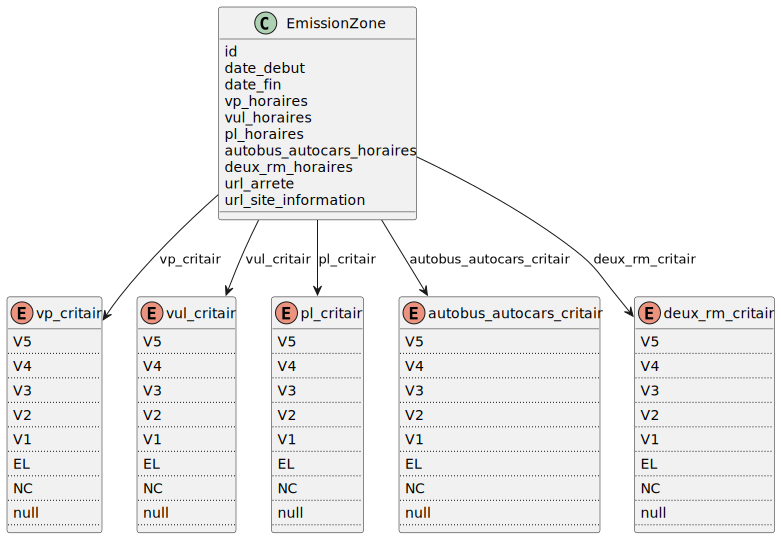

In [4]:
b0.show_semantic_model(True)

### 2. Transformers

In this example, we apply the `document` transformer on vp_critair, vul_critair, pl_critair, autobus_autocars_critair and deux_rm_critair enumeration bundles.

In [5]:
dangling_bundles = b0.children()
dangling_bundles["vp_critair"].document(enum_values = {"V5":"véhicules CRITAIR 5",
                                                       "V4": "véhicules CRITAIR 4",
                                                       "V3":"véhicules CRITAIR 3",
                                                       "V2":"véhicules CRITAIR 2",
                                                       "V1":"véhicules CRITAIR 1",
                                                       "EL":"véhicules électriques",
                                                       "NC":"véhicules sans vignette",
                                                       "null":"non mentionné"
})
dangling_bundles["vul_critair"].document(enum_values = {"V5":"véhicules CRITAIR 5",
                                                       "V4": "véhicules CRITAIR 4",
                                                       "V3":"véhicules CRITAIR 3",
                                                       "V2":"véhicules CRITAIR 2",
                                                       "V1":"véhicules CRITAIR 1",
                                                       "EL":"véhicules électriques",
                                                       "NC":"véhicules sans vignette",
                                                       "null":"non mentionné"
})
dangling_bundles["pl_critair"].document(enum_values = {"V5":"véhicules CRITAIR 5",
                                                       "V4": "véhicules CRITAIR 4",
                                                       "V3":"véhicules CRITAIR 3",
                                                       "V2":"véhicules CRITAIR 2",
                                                       "V1":"véhicules CRITAIR 1",
                                                       "EL":"véhicules électriques",
                                                       "NC":"véhicules sans vignette",
                                                       "null":"non mentionné"
})
dangling_bundles["autobus_autocars_critair"].document(enum_values = {"V5":"véhicules CRITAIR 5",
                                                       "V4": "véhicules CRITAIR 4",
                                                       "V3":"véhicules CRITAIR 3",
                                                       "V2":"véhicules CRITAIR 2",
                                                       "V1":"véhicules CRITAIR 1",
                                                       "EL":"véhicules électriques",
                                                       "NC":"véhicules sans vignette",
                                                       "null":"non mentionné"
})
dangling_bundles["deux_rm_critair"].document(enum_values = {"V5":"véhicules CRITAIR 5",
                                                       "V4": "véhicules CRITAIR 4",
                                                       "V3":"véhicules CRITAIR 3",
                                                       "V2":"véhicules CRITAIR 2",
                                                       "V1":"véhicules CRITAIR 1",
                                                       "EL":"véhicules électriques",
                                                       "NC":"véhicules sans vignette",
                                                       "null":"non mentionné"
})


dangling_bundles["deux_rm_critair"].show()

------- Enumeration -------
name : deux_rm_critair
IRI : None
definition : Deux roues, tricycles et quadricycles à moteur : Vignette CRITAIR à partir de laquelle la circulation n'est pas autorisée. Par exemple V4 signifie que les véhicules CRITAIR 4, CRITAIR 5 et sans vignettes ne sont pas autorisés à circuler. L'ordre des vignettes est le suivant : EL, V1, V2, V3, V4, V5, NC. EL correspond aux véhicules électriques et NC aux véhicules sans vignette.
type : ['string', 'null']
required : non
	 ------- Values -------
	 name : V5
	 definition : véhicules CRITAIR 5
	 IRI : None
	 --------------
	 name : V4
	 definition : véhicules CRITAIR 4
	 IRI : None
	 --------------
	 name : V3
	 definition : véhicules CRITAIR 3
	 IRI : None
	 --------------
	 name : V2
	 definition : véhicules CRITAIR 2
	 IRI : None
	 --------------
	 name : V1
	 definition : véhicules CRITAIR 1
	 IRI : None
	 --------------
	 name : EL
	 definition : véhicules électriques
	 IRI : None
	 --------------
	 name : NC
	 d

### 3. Loaders

Presently, we propose two loaders:
1. generateOntology
2. generateRDF

#### 3.1 Generate the ontology

In [6]:
g, kpi_results = b0.generateOntology(True)

##### Overview of the generated ontology

In [7]:
kpi_results

,IRI,type,related
0,https://data.grandlyon.com/onto/Emissionzone,Class,NA
1,https://data.grandlyon.com/onto/id,DatatypeProperty,EmissionZone
2,https://data.grandlyon.com/onto/dateDebut,DatatypeProperty,EmissionZone
3,https://data.grandlyon.com/onto/dateFin,DatatypeProperty,EmissionZone
4,https://data.grandlyon.com/onto/vpHoraires,DatatypeProperty,EmissionZone
...,...,...,...
56,https://data.grandlyon.com/vocab/v2,Concept,deux_rm_critair
57,https://data.grandlyon.com/vocab/v1,Concept,deux_rm_critair
58,https://data.grandlyon.com/vocab/el,Concept,deux_rm_critair
59,https://data.grandlyon.com/vocab/nc,Concept,deux_rm_critair


##### Save the ontology in a file

In [8]:
with open("./results/onto.ttl", "w") as f:
    f.write(g.serialize(format="turtle"))

#### 3.2 Generate the RDF data

In [9]:
g_rdf = b0.generateRDF(True)

##### Save the RDf data in a file

In [10]:
with open("./results/instances.ttl", "w") as f:
    f.write(g_rdf.serialize(format="turtle"))